<a href="https://colab.research.google.com/github/naomori/codexa_LinearRegression_Introduction/blob/master/Chapter26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モデルを使って予測

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# csvファイルの読み込み
data = np.loadtxt('007-02/007-02.csv', delimiter=',', skiprows=1)
X = data[:, :3]
y = data[:, 3]
m = len(y)

In [0]:
# 正規化(Z-score normalization)

def norm(X):
  X_norm = np.zeros(X.shape)
  mean = np.zeros((1,X.shape[1]))
  std  = np.zeros((1,X.shape[1]))
  for i in range(X.shape[1]):
    mean[:, i] = np.mean(X[:, i])
    std[:, i] = np.std(X[:, i])
    X_norm[:, i] = (X[:, i] - float(mean[:, i]))/float(std[:, i])
  return X_norm, mean, std

In [0]:
# コスト関数

def cost(X, y, weight):
  m = len(y)
  J = 0
  y_shaped = y.reshape(len(y), 1)
  model = np.dot(X, weight)
  delta = np.dot((model - y_shaped).T, (model - y_shaped))
  J = delta / (m * 2)
  return J

In [0]:
# 学習率と学習回数（イテレーション）
alpha = 0.01
num_iters = 500

In [0]:
# 最急降下法(Gradient Descent)
def gradientDescent(X, y, weight, alpha, iterations):
  m = len(y)
  # コスト関数の履歴を記録する(必要はないが後で見てみる)
  J_history = np.zeros((iterations, 1))
  
  for i in range(iterations):
    weight -= alpha * (1.0/m) * np.transpose(X).dot(X.dot(weight) - np.transpose([y]))
    J_history[i] = cost(X, y, weight)
  return weight, J_history

In [0]:
# モデル式のパラメタ初期値
weight_init = np.zeros((4,1))

In [0]:
X_norm, mean, std = norm(X)
X_padded = np.column_stack((np.ones((m,1)), X_norm))

In [0]:
weight, J_history = gradientDescent(X_padded, y, weight_init, alpha, num_iters)

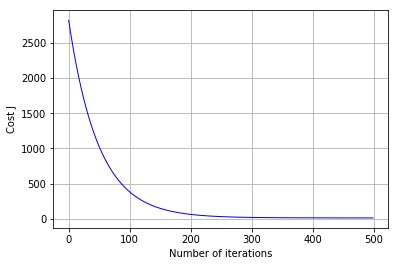

In [11]:
plt.plot(range(J_history.size), J_history, "-b", linewidth=1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.grid(True)
plt.show()

最急降下法の計算のたびに、コストが下がっていることがわかる

重みは以下の変数（weight）に w0, w1, w2, w3 の順番に格納されている

In [13]:
print(weight)

[[74.57745626]
 [ 2.22894853]
 [ 5.45280885]
 [ 3.22092053]]


$\hat{y} = 2.229\times Physics_{norm} + 5.453 \times Science_{norm} + 3.220 \times Statistics_{norm} + 74.577$

In [0]:
# こでくさくん = Physics 76, Science 96, Statistics 82 のときの
# Math の点数を予測する

# 数式の norm は各点数に対して正規化を施していることを示している

physics_norm = (76 - float(mean[:, 0]))/float(std[:,0])
science_norm = (96 - float(mean[:, 1]))/float(std[:,1])
statistics_norm = (82 - float(mean[:, 2]))/float(std[:,2])

In [18]:
# x_0 を追加する
pred_padded = np.array([1, physics_norm, science_norm, statistics_norm])
print(pred_padded)

[1.         0.13333314 2.17853956 0.72763147]


In [0]:
# こでくさくんの Math の点数を予測する
pred = pred_padded.dot(weight)

In [20]:
print(pred)

[89.09745188]
